# Exercises

Modify the program CoinTosses to toss a coin n times and print out after
every 100 tosses the proportion of heads minus 1/2. Do these numbers appear
to approach 0 as n increases? Modify the program again to print out, every
100 times, both of the following quantities: the proportion of heads minus 1/2,
and the number of heads minus half the number of tosses. Do these numbers
appear to approach 0 as n increases?

In [11]:
import random

def coin_flip() -> int:
    """Returns 0 for heads, 1 for tails for a flip of a fair coin."""
    return random.randint(0,1)

coin_flip()

1

In [12]:
num_trials = 10000
coin_tosses = [coin_flip() for _ in range(num_trials)]

In [27]:
count = 0
ratio = []
for i,toss in enumerate(coin_tosses):
    count += toss
    ratio.append(count/(i+1) - 1/2)

In [50]:
count_heads = 0
count_tails = 0
difference = []
for i,toss in enumerate(coin_tosses):
    if toss == 0:
        count_heads += 1
    else:
        count_tails += 1
    difference.append(count_heads - count_tails)

In [29]:
import matplotlib.pyplot as plt

In [31]:
t = range(num_trials)

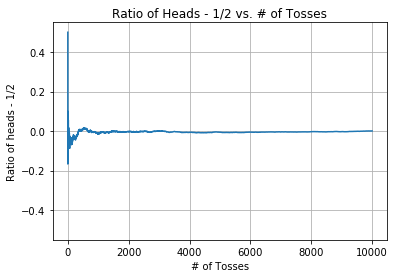

In [47]:
plt.plot(t,ratio)
plt.title('Ratio of Heads - 1/2 vs. # of Tosses')
plt.axis(ymin=-.55, ymax=+.55)
plt.xlabel('# of Tosses')
plt.ylabel('Ratio of heads - 1/2')
plt.grid()
plt.show()

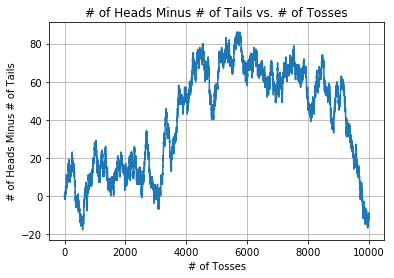

In [51]:
plt.plot(t,difference)
plt.title('# of Heads Minus # of Tails vs. # of Tosses')
plt.xlabel('# of Tosses')
plt.ylabel('# of Heads Minus # of Tails')
plt.grid()
plt.show()

Modify the program CoinTosses so that it tosses a coin n times and records
whether or not the proportion of heads is within .1 of .5 (i.e., between .4
and .6). Have your program repeat this experiment 100 times. About how
large must n be so that approximately 95 out of 100 times the proportion of
heads is between .4 and .6?

In [58]:
def test(n):
    trials = [[random.randint(0,1) for _ in range(n)]
             for _ in range(100)]
    def is_ratio(tosses, ratio, tol=.1):
        return abs((sum(tosses)/len(tosses)) - ratio) <= tol
    
    within_ratio = [is_ratio(trial, .5) 
                    for trial in trials]
    return sum(within_ratio)/len(within_ratio) * 100

In [61]:
ns = range(5,200)
test_results = [test(n) for n in ns]

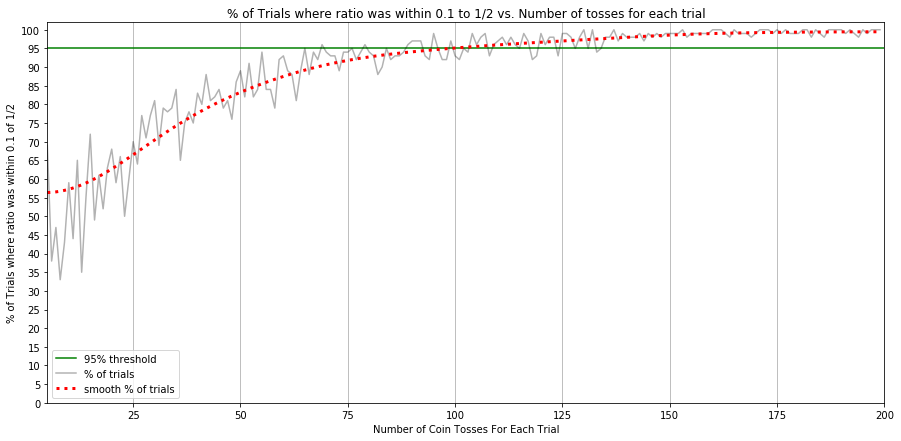

In [121]:
from scipy.ndimage.filters import gaussian_filter1d

test_results_smooth = gaussian_filter1d(test_results, sigma=14)
plt.figure(figsize=(15,7))
plt.axhline(y=95, color='g', linestyle='-', label='95% threshold')
plt.plot(ns, test_results, '-k', alpha=.3, label='% of trials')
plt.plot(ns, test_results_smooth, ':r', linewidth=3, label='smooth % of trials')
plt.xlabel('Number of Coin Tosses For Each Trial')
plt.xlim([5,200])
plt.ylim([0,102])
plt.yticks([i for i in range(0, 105, 5)])
plt.ylabel('% of Trials where ratio was within 0.1 of 1/2')
plt.title('% of Trials where ratio was within 0.1 to 1/2 vs. Number of tosses for each trial')
plt.grid(axis='x')
plt.legend()
plt.show()

In the early 1600s, Galileo was asked to explain the fact that, although the
number of triples of integers from 1 to 6 with sum 9 is the same as the number
of such triples with sum 10, when three dice are rolled, a 9 seemed to come
up less often than a 10—supposedly in the experience of gamblers.

- Write a program to simulate the roll of three dice a large number of times and keep track of the proportion of times that the sum is 9 and the proportion of times it is 10.
- Can you conclude from your simulations that the gamblers were correct?

In [12]:
from collections import Counter
import random
import numpy as np

def count_sums(rolls):
    rolls = np.random.randint(1, 6+1, size=(rolls, 3))
    rolls_sum = np.sum(rolls, axis=1)
    return Counter(rolls_sum)

distribution = count_sums(1000000)

In [13]:
distribution[9]

115828

In [14]:
distribution[10]

124419

Consider the bet that all three dice will turn up sixes at least once in $n$ rolls
of three dice. Calculate $f(n)$, the probability of at least one triple-six when
three dice are rolled $n$ times. Determine the smallest value of $n$ necessary for
a favorable bet that a triple-six will occur when three dice are rolled $n$ times.
(DeMoivre would say it should be about $216 \log 2 = 149.7$ and so would answer
$150$—see Exercise 1.2.17. Do you agree with him?)

In [78]:
def contains_triple_six_ratio(n,m=100):
    rolls = np.random.randint(1,6+1,size=(n,m,3))
    has_triple_six = (rolls.sum(axis=-1)==18).any(axis=0).mean()
    return has_triple_six

contains_triple_six_ratio(100, 1000)

0.369

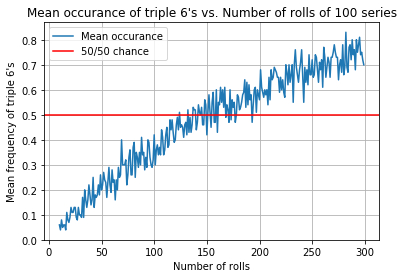

In [102]:
from matplotlib import pyplot as plt

ns = np.arange(10,300,1)
ratios = []
for n in ns:
    ratios.append(contains_triple_six_ratio(n))
    
plt.plot(ns,ratios,label='Mean occurance')
plt.title("Mean occurance of triple 6's vs. Number of rolls of 100 series")
plt.xlabel('Number of rolls')
plt.ylabel('Mean frequency of triple 6\'s')
plt.axhline(y=.5, color='r', linestyle='-', label='50/50 chance')
plt.legend()
plt.grid()
plt.show()

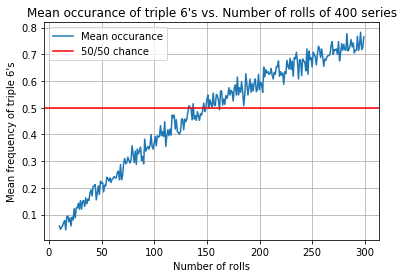

In [101]:
ns = np.arange(10,300,1)
ratios = []
for n in ns:
    ratios.append(contains_triple_six_ratio(n, m=400))

plt.plot(ns,ratios,label='Mean occurance')
plt.title("Mean occurance of triple 6's vs. Number of rolls of 400 series")
plt.xlabel('Number of rolls')
plt.ylabel('Mean frequency of triple 6\'s')
plt.axhline(y=.5, color='r', linestyle='-', label='50/50 chance')
plt.legend()
plt.grid()
plt.show()

You are offered the following game. A fair coin will be tossed until the first time it comes up heads. If this occurs on the jth toss you are paid $2^j$ dollars. ou are sure to win at least 2 dollars so you should be willing to pay to play this game—but how much? Few people would pay as much as 10 dollars to lay this game. See if you can decide, by simulation, a reasonable amount that you would be willing to pay, per game, if you will be allowed to make a large number of plays of the game. Does the amount that you would be willing to pay per game depend upon the number of plays that you will be allowed?

In [183]:
def mean_win(n, m=20, value=1):
    tosses = np.random.randint(0,1+1, size=(n,m))
    idx = np.argmax(tosses == value,axis=1)
    return 2 ** (idx.mean() + 1)

mean_win(100000)

4.006270960999667

Write a program to simulate a random walk in three dimensions and see
whether, from this simulation and the results of (a) and (b), you could
have guessed Pólya’s result.

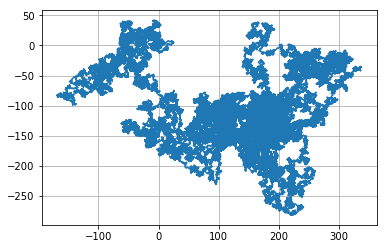

In [229]:
def random_path_2d(n):
    directions = np.random.randint(0,1+1,size=(n,2))*2 - 1
    path = np.cumsum(directions, axis=0)
    return path[:,0], path[:,1]

path_x, path_y = random_path_2d(100000)
plt.plot(path_x, path_y)
plt.grid(which='major')
plt.axis('image')
plt.show()